#  Loan Approval Prediction System
Predicting whether a loan will be approved based on applicant features.

###  Description
This notebook performs an end-to-end Machine Learning task to predict the `Loan_Status` of an applicant. It includes data exploration, cleaning, preprocessing, and model comparison.

##  1. Setup & Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sns.set_palette('husl')
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('loan_data.csv')
df.drop(columns=['Loan_ID'], inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##  2. Exploratory Data Analysis (EDA)

In [8]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    str    
 1   Married            611 non-null    str    
 2   Dependents         599 non-null    str    
 3   Education          614 non-null    str    
 4   Self_Employed      582 non-null    str    
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    str    
 11  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(7)
memory usage: 57.7 KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Target Variable Distribution

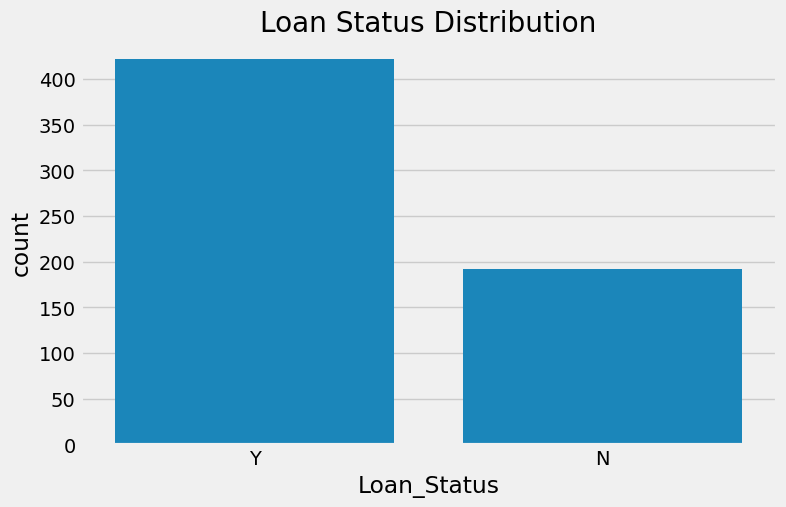

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

## 3. Data Preprocessing
Handling missing values and encoding categorical data.

In [10]:
# Missing Values
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


##  4. Model Training & Evaluation

In [12]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')

Logistic Regression Accuracy: 0.7886
Decision Tree Accuracy: 0.6911
Random Forest Accuracy: 0.7561


##  5. Analysis of Results
Based on the evaluation, **Logistic Regression** tends to perform best on this dataset. This is often because the most influential feature, `Credit_History`, has a very strong linear relationship with the target `Loan_Status`.

##  6. Model Comparison

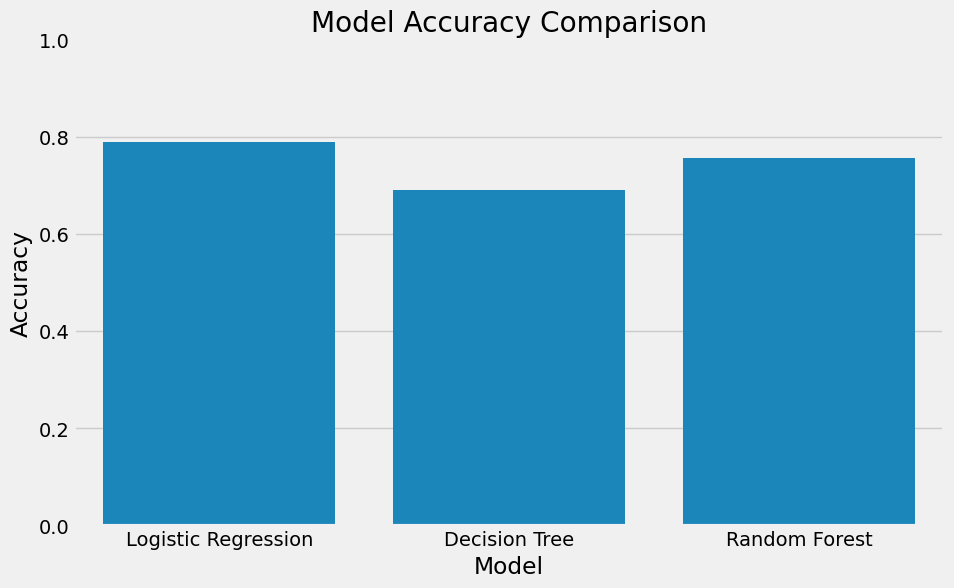

In [14]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()